<a href="https://colab.research.google.com/github/jocelynzym/Junior/blob/master/hw2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

name: Yimiao Zhang

net ID: yz6756

**a.**

In [5]:
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

# for 3d interactive plots
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d


%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 58 to 108
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         140 non-null    float64
 1   radio      140 non-null    float64
 2   newspaper  140 non-null    float64
 3   sales      140 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 18 to 177
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         60 non-null     float64
 1   radio      60 non-null     float64
 2   newspaper  60 non-null     float64
 3   sales      60 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


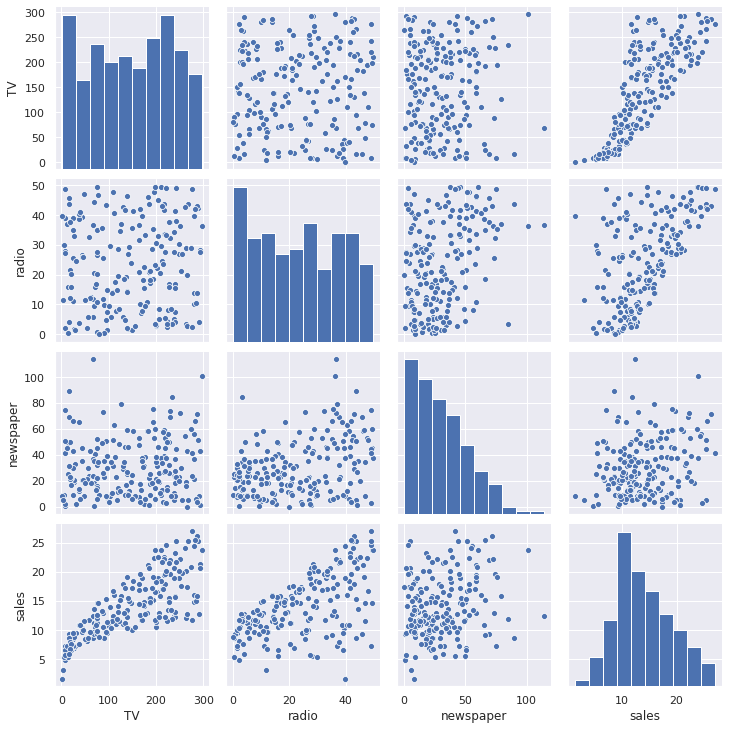

In [6]:
url = 'http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv'
df = pd.read_csv(url, index_col=0)
df.head()
sns.pairplot(df)
train, test = train_test_split(df, test_size=0.3)
train.info()
test.info()

**Comment:**

1.TV ad budget and radio ad budget seem to be correlated with product sales.

2.Newspaper ad budget and radio ad budget seem to be correlated with one another.

**b.**





TV
coefficients: 0.04975660746841898  intercept: 6.8082819573829285
mse_train: 10.62174965991341
r2_train: 0.627148437404985
mse_test: 10.413335008505763
r2_test: 0.5626647484182854

Radio
coefficients: 0.20622613944141732  intercept: 9.199783562460773
mse_train: 18.55307427477036
r2_train: 0.3487379239979289
mse_test: 17.029754573871234
r2_test: 0.2847908960140594

Newspaper
coefficients: 0.059741247204758395  intercept: 12.224034871708273
mse_train: 26.743714769949715
r2_train: 0.06122473595819833
mse_test: 23.220570222460495
r2_test: 0.02479139374506434


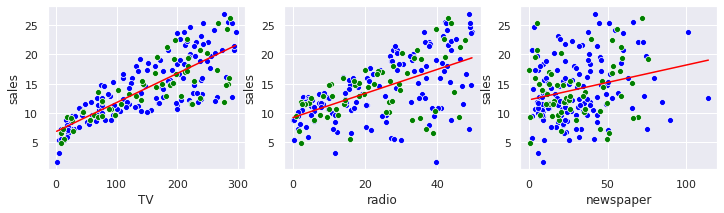

In [7]:
#fit
reg_tv = LinearRegression().fit(train[['TV']], train['sales'])
reg_radio = LinearRegression().fit(train[['radio']], train['sales'])
reg_news = LinearRegression().fit(train[['newspaper']], train['sales'])

#plot
fig = plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
sns.scatterplot(data=train, x="TV", y="sales",color='blue');
sns.scatterplot(data=test, x="TV", y="sales",color='green');
sns.lineplot(data=train, x="TV", y=reg_tv.predict(train[['TV']]), color='red');

plt.subplot(1,3,2)
sns.scatterplot(data=train, x="radio", y="sales",color='blue');
sns.scatterplot(data=test, x="radio", y="sales",color='green');
sns.lineplot(data=train, x="radio", y=reg_radio.predict(train[['radio']]), color='red');

plt.subplot(1,3,3)
sns.scatterplot(data=train, x="newspaper", y="sales",color='blue');
sns.scatterplot(data=test, x="newspaper", y="sales",color='green');
sns.lineplot(data=train, x="newspaper", y=reg_news.predict(train[['newspaper']]), color='red');

#info on training data
y_pred_tv_train = reg_tv.predict(train[['TV']])
y_pred_radio_train = reg_radio.predict(train[['radio']])
y_pred_news_train = reg_news.predict(train[['newspaper']])

mse_tv_train = metrics.mean_squared_error(train['sales'],y_pred_tv_train)
mse_radio_train = metrics.mean_squared_error(train['sales'],y_pred_radio_train)
mse_news_train = metrics.mean_squared_error(train['sales'],y_pred_news_train)

r2_tv_train = 1-np.mean( (y_pred_tv_train - train['sales'])**2 / np.std(train['sales'])**2 )
r2_radio_train = 1-np.mean( (y_pred_radio_train - train['sales'])**2 / np.std(train['sales'])**2 )
r2_news_train = 1-np.mean( (y_pred_news_train - train['sales'])**2 / np.std(train['sales'])**2 )


#info on test data
y_pred_tv_test = reg_tv.predict(test[['TV']])
y_pred_radio_test = reg_radio.predict(test[['radio']])
y_pred_news_test = reg_news.predict(test[['newspaper']])

mse_tv_test = metrics.mean_squared_error(test['sales'],y_pred_tv_test)
mse_radio_test = metrics.mean_squared_error(test['sales'],y_pred_radio_test)
mse_news_test = metrics.mean_squared_error(test['sales'],y_pred_news_test)

r2_tv_test = 1-np.mean( (y_pred_tv_test - test['sales'])**2 / np.std(test['sales'])**2 )
r2_radio_test = 1-np.mean( (y_pred_radio_test - test['sales'])**2 / np.std(test['sales'])**2 )
r2_news_test = 1-np.mean( (y_pred_news_test - test['sales'])**2 / np.std(test['sales'])**2 )

#print 
print("\nTV")
print("coefficients:", reg_tv.coef_[0], " intercept:",reg_tv.intercept_)
print("mse_train:", mse_tv_train)
print("r2_train:", r2_tv_train)
print("mse_test:", mse_tv_test)
print("r2_test:", r2_tv_test)

print("\nRadio")
print("coefficients:", reg_radio.coef_[0], " intercept:", reg_radio.intercept_)
print("mse_train:", mse_radio_train)
print("r2_train:", r2_radio_train)
print("mse_test:", mse_radio_test)
print("r2_test:", r2_radio_test)

print("\nNewspaper")
print("coefficients:", reg_news.coef_[0],  " intercept:",reg_news.intercept_)
print("mse_train:", mse_news_train)
print("r2_train:", r2_news_train)
print("mse_test:", mse_news_test)
print("r2_test:", r2_news_test)



**Comment:**

1.Radio ads seems to have greatest effect on product sales. 

2.TV ad budgets regression model is most effective at predicting product sales.


**c.**


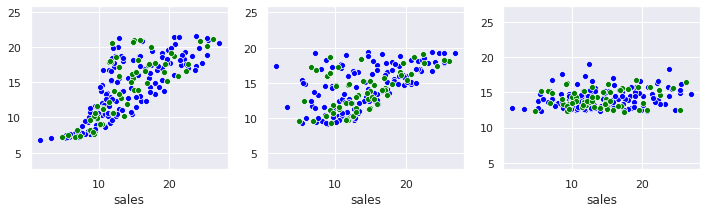

In [31]:
#plot
fig = plt.figure(figsize=(12,3))


plt.subplot(1,3,1)
plt.axis('equal')
sns.scatterplot(data=train, x="sales", y=y_pred_tv_train, color='blue');
sns.scatterplot(data=test, x="sales", y=y_pred_tv_test, color='green');


plt.subplot(1,3,2)
plt.axis('equal')
sns.scatterplot(data=train, x="sales", y=y_pred_radio_train, color='blue');
sns.scatterplot(data=test, x="sales", y=y_pred_radio_test, color='green');


plt.subplot(1,3,3)
plt.axis('equal')
sns.scatterplot(data=train, x="sales", y=y_pred_news_train, color='blue');
sns.scatterplot(data=test, x="sales", y=y_pred_news_test, color='green');

**Comment c.1:**

I would expect this plot to look like a straight line (y=x) for a model that explain the data well.


In [9]:
#TV
 #train
res_TV_train = np.subtract(train['sales'],y_pred_tv_train)
 #test
res_TV_test = np.subtract(test['sales'],y_pred_tv_test)
 #sum
res_TV = np.hstack((res_TV_train,res_TV_test))
mean_res_TV = np.mean(res_TV)
print("mean_res_TV: ",mean_res_TV)


#radio
 #train
res_radio_train = np.subtract(train['sales'],y_pred_radio_train)
 #test
res_radio_test = np.subtract(test['sales'],y_pred_radio_test)
 #sum
res_radio = np.hstack((res_radio_train,res_radio_test))
mean_res_radio = np.mean(res_radio)
print("mean_res_radio: ",mean_res_radio)


#newspaper
 #train
res_news_train = np.subtract(train['sales'],y_pred_news_train)
 #test
res_news_test = np.subtract(test['sales'],y_pred_news_test)
 #sum
res_news = np.hstack((res_news_train,res_news_test))
mean_res_news = np.mean(res_news)
print("mean_res_news: ",mean_res_news)

mean_res_TV:  -0.10211791105792621
mean_res_radio:  0.025071529574094312
mean_res_news:  -0.02686893880246128


**Comment c.2:**

1.

mean_res_TV:  -0.11878975363767567

mean_res_radio:  0.17876459506032938

mean_res_news:  0.31067965908984324

2.

Zero should be the mean redidual for a well-fitted regression model.

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

Text(0.5, 0, 'y_TV')

Text(0, 0.5, 'y-y^')

Text(0.5, 0, 'y_radio')

Text(0, 0.5, 'y-y^')

Text(0.5, 0, 'y_news')

Text(0, 0.5, 'y-y^')

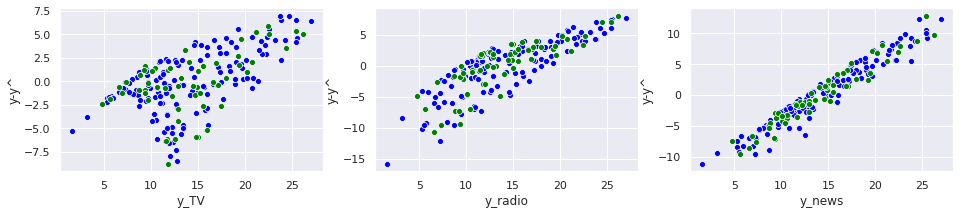

In [30]:
fig = plt.figure(figsize=(16,3))
plt.axis('equal')

plt.subplot(1,3,1)
sns.scatterplot(data=train, x="sales", y=res_TV_train, color='blue');
sns.scatterplot(data=test, x="sales", y=res_TV_test, color='green');
plt.xlabel('y_TV')
plt.ylabel('y-y^')

plt.subplot(1,3,2)
sns.scatterplot(data=train, x="sales", y=res_radio_train, color='blue');
sns.scatterplot(data=test, x="sales", y=res_radio_test, color='green');
plt.xlabel('y_radio')
plt.ylabel('y-y^')

plt.subplot(1,3,3)
sns.scatterplot(data=train, x="sales", y=res_news_train, color='blue');
sns.scatterplot(data=test, x="sales", y=res_news_test, color='green');
plt.xlabel('y_news')
plt.ylabel('y-y^')

**Comment c.3:**

 The residuals seem to increase linearly as actual sales increase.

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

Text(0.5, 0, 'TV')

Text(0, 0.5, 'y-y^          TV model')

Text(0.5, 0, 'radio')

Text(0, 0.5, 'y-y^          TV model')

Text(0.5, 0, 'newspaper')

Text(0, 0.5, 'y-y^          TV model')

Text(0.5, 0, 'TV')

Text(0, 0.5, 'y-y^          radio model')

Text(0.5, 0, 'radio')

Text(0, 0.5, 'y-y^          radio model')

Text(0.5, 0, 'newspaper')

Text(0, 0.5, 'y-y^          newspaper model')

Text(0.5, 0, 'TV')

Text(0, 0.5, 'y-y^          newspaper model')

Text(0.5, 0, 'radio')

Text(0, 0.5, 'y-y^          newspaper model')

Text(0.5, 0, 'newspaper')

Text(0, 0.5, 'y-y^          newspaper model')

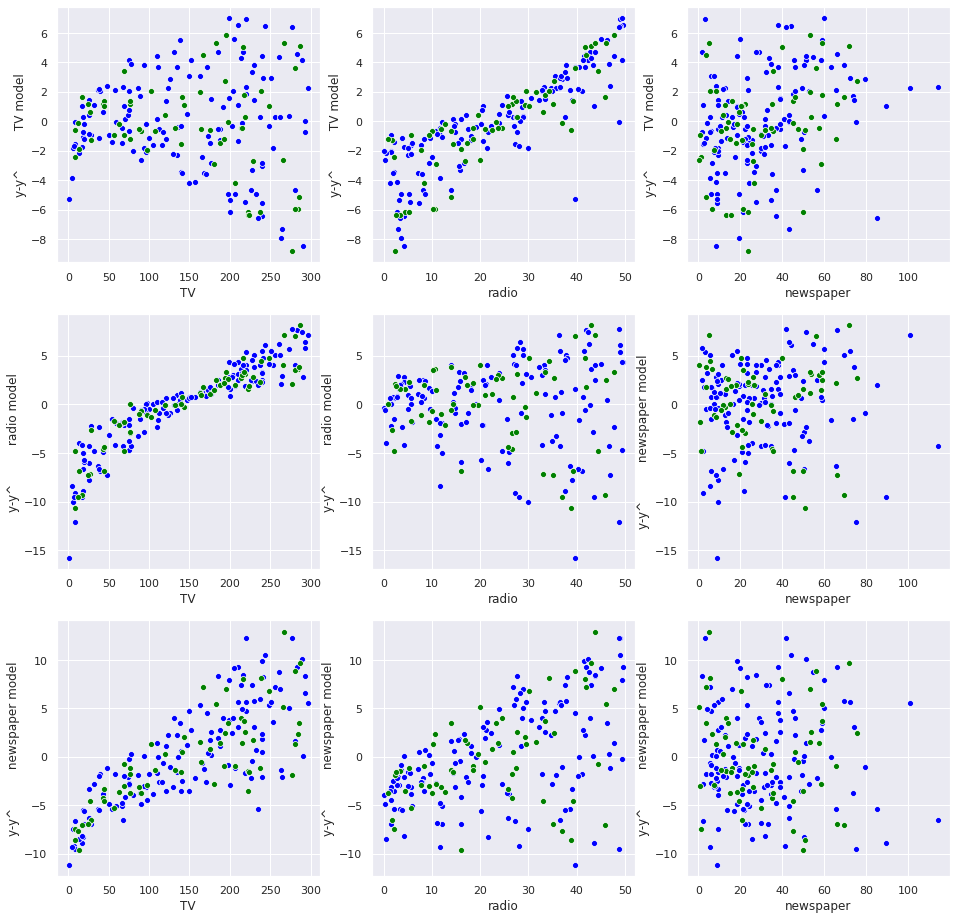

In [40]:
fig = plt.figure(figsize=(16,16))
plt.axis('equal')

plt.subplot(3,3,1)
sns.scatterplot(data=train, x="TV", y=res_TV_train, color='blue');
sns.scatterplot(data=test, x="TV", y=res_TV_test, color='green');
plt.xlabel('TV')
plt.ylabel('y-y^          TV model')

plt.subplot(3,3,2)
sns.scatterplot(data=train, x="radio", y=res_TV_train, color='blue');
sns.scatterplot(data=test, x="radio", y=res_TV_test, color='green');
plt.xlabel('radio')
plt.ylabel('y-y^          TV model')

plt.subplot(3,3,3)
sns.scatterplot(data=train, x="newspaper", y=res_TV_train, color='blue');
sns.scatterplot(data=test, x="newspaper", y=res_TV_test, color='green');
plt.xlabel('newspaper')
plt.ylabel('y-y^          TV model')


plt.subplot(3,3,4)
sns.scatterplot(data=train, x="TV", y=res_radio_train, color='blue');
sns.scatterplot(data=test, x="TV", y=res_radio_test, color='green');
plt.xlabel('TV')
plt.ylabel('y-y^          radio model')


plt.subplot(3,3,5)
sns.scatterplot(data=train, x="radio", y=res_radio_train, color='blue');
sns.scatterplot(data=test, x="radio", y=res_radio_test, color='green');
plt.xlabel('radio')
plt.ylabel('y-y^          radio model')


plt.subplot(3,3,6)
sns.scatterplot(data=train, x="newspaper", y=res_radio_train, color='blue');
sns.scatterplot(data=test, x="newspaper", y=res_radio_test, color='green');
plt.xlabel('newspaper')
plt.ylabel('y-y^          newspaper model')

plt.subplot(3,3,7)
sns.scatterplot(data=train, x="TV", y=res_news_train, color='blue');
sns.scatterplot(data=test, x="TV", y=res_news_test, color='green');
plt.xlabel('TV')
plt.ylabel('y-y^          newspaper model')


plt.subplot(3,3,8)
sns.scatterplot(data=train, x="radio", y=res_news_train, color='blue');
sns.scatterplot(data=test, x="radio", y=res_news_test, color='green');
plt.xlabel('radio')
plt.ylabel('y-y^          newspaper model')


plt.subplot(3,3,9)
sns.scatterplot(data=train, x="newspaper", y=res_news_train, color='blue');
sns.scatterplot(data=test, x="newspaper", y=res_news_test, color='green');
plt.xlabel('newspaper')
plt.ylabel('y-y^          newspaper model')

Comment c.4:

For TV model, the residuals seem to increase linearly as radio feature increases.

For radio model, the residuals seem to increase linearly as TV feature increases.

For newspaper model, the residuals seem to increase linearly as TV feature increases.

**d.**

In [44]:
#fit a multiple linear regression
reg_multi_ad = LinearRegression().fit(train[['TV', 'radio', 'newspaper']], train['sales'])

#print the intercept and coefficient
print("Coefficients (TV, radio, newspaper):", reg_multi_ad.coef_)
print("Intercept: ", reg_multi_ad.intercept_)

y_pred_train = reg_multi_ad.predict(train[['TV', 'radio', 'newspaper']])
y_pred_test = reg_multi_ad.predict(test[['TV', 'radio', 'newspaper']])

#MSE
 #on the training data
 
mse_multi_train = metrics.mean_squared_error(train['sales'],y_pred_train)
print("mse_multi_train: ", mse_multi_train)
 #on the test data
mse_multi_test = metrics.mean_squared_error(test['sales'],y_pred_test)
print("mse_multi_test: ", mse_multi_test)

#R2
 #on the training data
r2_multi_train = 1-np.mean( (y_pred_train - train['sales'])**2 / np.std(train['sales'])**2 )
print("r2_multi_train: ", r2_multi_train)
 #on the test data
r2_multi_test = 1-np.mean( (y_pred_test - test['sales'])**2 / np.std(test['sales'])**2 )
print("r2_multi_test: ", r2_multi_test)

Coefficients (TV, radio, newspaper): [0.04689414 0.18325057 0.00122719]
Intercept:  2.883612246098801
mse_multi_train:  2.7857783828564484
mse_multi_test:  2.8407570554949007
r2_multi_train:  0.9022117959519008
r2_multi_test:  0.8806949742294267


**Comment d.1:**

The coefficient of
the multiple regression model is a vector, and the coefficients of the three simple linear regression models are scales.


(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

Text(0.5, 0, 'y')

Text(0, 0.5, 'y^')

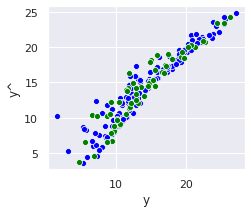

In [46]:
#plot
fig = plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
plt.axis('equal')
sns.scatterplot(data=train, x="sales", y=y_pred_train, color='blue');
sns.scatterplot(data=test, x="sales", y=y_pred_test, color='green');
plt.xlabel('y')
plt.ylabel('y^')

**Comment d.2:**

I would expect this plot to look like a straight line (y=x) for a model that explain the data well.

In [48]:
#residual 
 #train
res_train = np.subtract(train['sales'],y_pred_train)
 #test
res_test = np.subtract(test['sales'],y_pred_test)
 #sum
res = np.hstack((res_train,res_test))
mean_res = np.mean(res)
print("mean_res: ",mean_res)

mean_res:  -0.05718054318601631


**Comment d.3:**

1.mean_res:  -0.05718054318601631

2.Zero should be the mean redidual for a well-fitted regression model.

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

Text(0.5, 0, 'y')

Text(0, 0.5, 'y-y^')

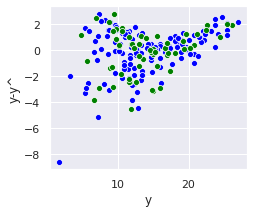

In [49]:
fig = plt.figure(figsize=(12,3))
plt.axis('equal')

plt.subplot(1,3,1)
sns.scatterplot(data=train, x="sales", y=res_train, color='blue');
sns.scatterplot(data=test, x="sales", y=res_test, color='green');
plt.xlabel('y')
plt.ylabel('y-y^')

**Comment d.4:**

The residual is basically symmetric about the x axis. When y is greater than 15, the image is approximately a straight line

**Comment d.4:**

The residual is basically symmetric about the x axis. When y is greater than 15, the image is approximately a straight line.

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

Text(0.5, 0, 'TV')

Text(0, 0.5, 'y-y^          multi model')

Text(0.5, 0, 'radio')

Text(0, 0.5, 'y-y^          multi model')

Text(0.5, 0, 'newspaper')

Text(0, 0.5, 'y-y^          multi model')

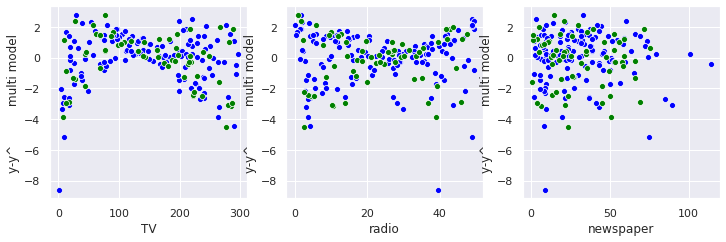

In [51]:
fig = plt.figure(figsize=(12,12))
plt.axis('equal')

plt.subplot(3,3,1)
sns.scatterplot(data=train, x="TV", y=res_train, color='blue');
sns.scatterplot(data=test, x="TV", y=res_test, color='green');
plt.xlabel('TV')
plt.ylabel('y-y^          multi model')

plt.subplot(3,3,2)
sns.scatterplot(data=train, x="radio", y=res_train, color='blue');
sns.scatterplot(data=test, x="radio", y=res_test, color='green');
plt.xlabel('radio')
plt.ylabel('y-y^          multi model')

plt.subplot(3,3,3)
sns.scatterplot(data=train, x="newspaper", y=res_train, color='blue');
sns.scatterplot(data=test, x="newspaper", y=res_test, color='green');
plt.xlabel('newspaper')
plt.ylabel('y-y^          multi model')

**Comment d.5:**

The residual is basically symmetric about the x axis for each of the three features.

**e.**

In [68]:
df.eval('news_radio = newspaper * radio' , inplace=True)
df.eval('TV_radio = TV * radio' , inplace=True)
df.eval('news_TV = newspaper * TV' , inplace=True)
df.eval('news_radio_TV = newspaper * radio * TV' , inplace=True)
train.eval('news_radio = newspaper * radio' , inplace=True)
train.eval('TV_radio = TV * radio' , inplace=True)
train.eval('news_TV = newspaper * TV' , inplace=True)
train.eval('news_radio_TV = newspaper * radio * TV' , inplace=True)
test.eval('news_radio = newspaper * radio' , inplace=True)
test.eval('TV_radio = TV * radio' , inplace=True)
test.eval('news_TV = newspaper * TV' , inplace=True)
test.eval('news_radio_TV = newspaper * radio * TV' , inplace=True)
train.head()

,TV,radio,newspaper,sales,news_radio,TV_radio,news_TV,news_radio_TV
58,136.2,19.2,16.6,13.2,318.72,2615.04,2260.92,43409.664
133,8.4,27.2,2.1,5.7,57.12,228.48,17.64,479.808
144,104.6,5.7,34.4,10.4,196.08,596.22,3598.24,20509.968
168,206.8,5.2,19.4,12.2,100.88,1075.36,4011.92,20861.984
88,110.7,40.6,63.2,16.0,2565.92,4494.42,6996.24,284047.344


In [69]:
#fit a multiple linear regression
reg_inter_ad = LinearRegression().fit(train[['TV', 'radio', 'newspaper','news_radio','TV_radio','news_TV','news_radio_TV']], train['sales'])

#print the intercept and coefficient
print("Coefficients (TV, radio, newspaper):", reg_inter_ad.coef_)
print("Intercept: ", reg_inter_ad.intercept_)

y_pred_inter_train = reg_inter_ad.predict(train[['TV', 'radio', 'newspaper','news_radio','TV_radio','news_TV','news_radio_TV']])
y_pred_inter_test = reg_inter_ad.predict(test[['TV', 'radio', 'newspaper','news_radio','TV_radio','news_TV','news_radio_TV']])

#MSE
 #on the training data
 
mse_inter_train = metrics.mean_squared_error(train['sales'],y_pred_inter_train)
print("mse_inter_train: ", mse_inter_train)
 #on the test data
mse_inter_test = metrics.mean_squared_error(test['sales'],y_pred_inter_test)
print("mse_inter_test: ", mse_inter_test)

#R2
 #on the training data
r2_inter_train = 1-np.mean( (y_pred_inter_train - train['sales'])**2 / np.std(train['sales'])**2 )
print("r2_inter_train: ", r2_inter_train)
 #on the test data
r2_inter_test = 1-np.mean( (y_pred_inter_test - test['sales'])**2 / np.std(test['sales'])**2 )
print("r2_inter_test: ", r2_inter_test)

Coefficients (TV, radio, newspaper): [ 2.27618081e-02  2.07365235e-02  2.32279426e-02 -6.65423007e-05
  1.12228979e-03 -1.32776087e-04  2.49890282e-07]
Intercept:  6.2160881659905245
mse_inter_train:  0.9453877059245043
mse_inter_test:  0.6719563284057875
r2_inter_train:  0.9668143860759244
r2_inter_test:  0.9717794357239796


(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

Text(0.5, 0, 'y')

Text(0, 0.5, 'y^')

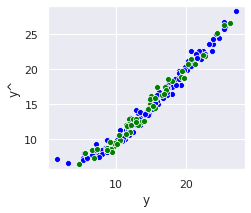

In [70]:
#plot
fig = plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
plt.axis('equal')
sns.scatterplot(data=train, x="sales", y=y_pred_inter_train, color='blue');
sns.scatterplot(data=test, x="sales", y=y_pred_inter_test, color='green');
plt.xlabel('y')
plt.ylabel('y^')

In [71]:
#residual 
 #train
res_train = np.subtract(train['sales'],y_pred_inter_train)
 #test
res_test = np.subtract(test['sales'],y_pred_inter_test)
 #sum
res = np.hstack((res_train,res_test))
mean_res = np.mean(res)
print("mean_res: ",mean_res)

mean_res:  -0.015630426473665568


(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

Text(0.5, 0, 'y')

Text(0, 0.5, 'y-y^')

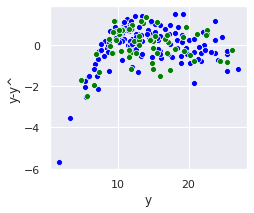

In [72]:
fig = plt.figure(figsize=(12,3))
plt.axis('equal')

plt.subplot(1,3,1)
sns.scatterplot(data=train, x="sales", y=res_train, color='blue');
sns.scatterplot(data=test, x="sales", y=res_test, color='green');
plt.xlabel('y')
plt.ylabel('y-y^')

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

Text(0.5, 0, 'TV')

Text(0, 0.5, 'y-y^          inter model')

Text(0.5, 0, 'radio')

Text(0, 0.5, 'y-y^          inter model')

Text(0.5, 0, 'newspaper')

Text(0, 0.5, 'y-y^          inter model')

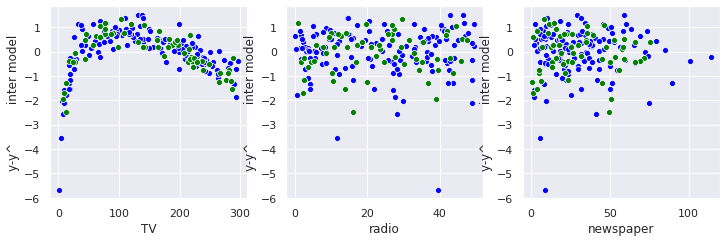

In [73]:
fig = plt.figure(figsize=(12,12))
plt.axis('equal')

plt.subplot(3,3,1)
sns.scatterplot(data=train, x="TV", y=res_train, color='blue');
sns.scatterplot(data=test, x="TV", y=res_test, color='green');
plt.xlabel('TV')
plt.ylabel('y-y^          inter model')

plt.subplot(3,3,2)
sns.scatterplot(data=train, x="radio", y=res_train, color='blue');
sns.scatterplot(data=test, x="radio", y=res_test, color='green');
plt.xlabel('radio')
plt.ylabel('y-y^          inter model')

plt.subplot(3,3,3)
sns.scatterplot(data=train, x="newspaper", y=res_train, color='blue');
sns.scatterplot(data=test, x="newspaper", y=res_test, color='green');
plt.xlabel('newspaper')
plt.ylabel('y-y^          inter model')

**Comment:**

The interaction effects are helpful for explaining the 
effect of ads on product sales.

The residual plots of (y-y^) and  TV feature does not seem to be random and unpredictable. We still have further opportunities for improving the model.
